In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import *
from math import *
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
with MPRester("pBDutDDdaCLFGZOVupy8") as m:

    band_structure = m.get_phonon_bandstructure_by_material_id("mp-961682")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



## Structure de bandes de phonons du TiSnPd

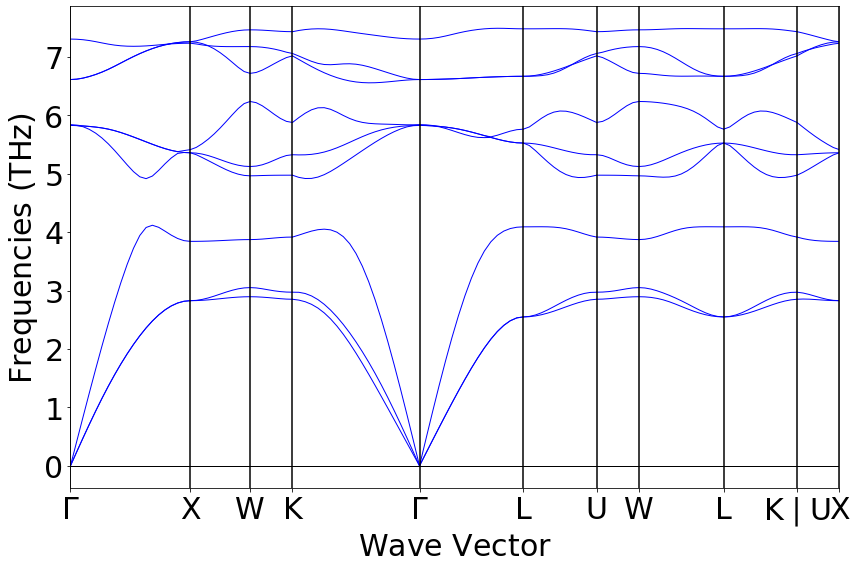

In [3]:
bsplotter = PhononBSPlotter(band_structure)
bsplotter.show()

## Zone de brillouin du TiSnPd

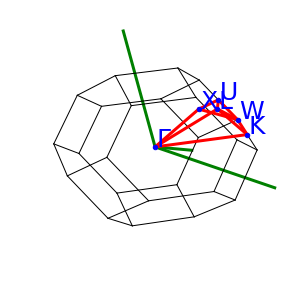

In [4]:
bsplotter.plot_brillouin()

##  Calcul de la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin

La vitesse du son pour une branche acoustique selon une direction de la zone de Brillouin est donnée par la formule suivante :
$v = \frac{\partial \omega}{\partial q} = 2 \pi \frac{\partial f}{\partial q}$

Cette formule est équivalente à calculer la pente de la branche acoustique selon une direction de la zone de Brillouin. Afin de calculer cette pente il faut déterminer la droite passant par deux points de la branche acoustique : $f(q)= aq + b$ avec a, b des constantes à déterminer. 

Vitesse du son de la première branche acoustique selon la direction Γ - X : 2803.666524976952 m/s
Vitesse du son de la deuxième branche acoustique selon la direction K - Γ : 2811.0419617220714 m/s
Vitesse du son de la troisième branche acoustique selon la direction Γ - L : 5240.341329865841 m/s



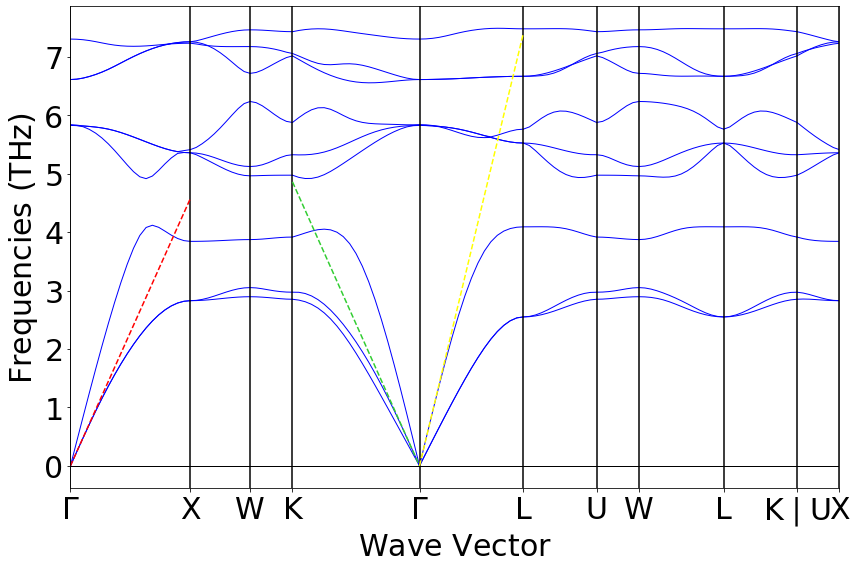

In [5]:
data = bsplotter.bs_plot_data()
d = data.get('distances')
f = data.get('frequency')

# Selection de 2 points pour chaque branche acoustique différente
x = np.array([[d[0][0], d[0][1]], [d[3][-2], d[3][-1]], [d[4][0], d[4][1]]])
y = np.array([[f[0][0][0], f[0][0][1]], [f[3][1][-2], f[3][1][-1]], [f[4][2][0], f[4][2][1]]])

# Calcul des coefficients a,b
coef = [0,0,0]
for i in range(0,3):
    coef[i] = np.polyfit(x[i], y[i], 1)

# Calcul des droites f(q)= aq + b 
x_axis_1 = np.linspace(d[0][0], d[0][-1], 1000)
x_axis_2 = np.linspace(d[3][0], d[3][-1], 1000)
x_axis_3 = np.linspace(d[4][0], d[4][-1], 1000)

slope1 = coef[0][0]*x_axis_1 + coef[0][1]
slope2 = coef[1][0]*x_axis_2 + coef[1][1]
slope3 = coef[2][0]*x_axis_3 + coef[2][1]

# Vitesse du son [m/s]
# Pente : a [THz/A^(-1)] -> (2*pi*1e12*1e-10)*a [m/s] 
v1 = np.abs(coef[0][0])*2*pi*1e12*1e-10
v2 = np.abs(coef[1][0])*2*pi*1e12*1e-10
v3 = np.abs(coef[2][0])*2*pi*1e12*1e-10
print("Vitesse du son de la première branche acoustique selon la direction \u0393 - X : {} m/s".format(v1))
print("Vitesse du son de la deuxième branche acoustique selon la direction K - \u0393 : {} m/s".format(v2))
print("Vitesse du son de la troisième branche acoustique selon la direction \u0393 - L : {} m/s\n".format(v3))

bsplotter.get_plot()
plt.plot(x_axis_1, slope1, color='red', ls='--')
plt.plot(x_axis_2, slope2, color='limegreen', ls='--')
plt.plot(x_axis_3, slope3, color='yellow', ls='--')
plt.show()